In [67]:
import random
import string

swaps = 0

def partition(A, low, high):

  global swaps

  L=low
  R=high
  pivot = A[low]

  while L < R:
    while L <= high and A[L] <= pivot:
      L += 1

    while low <= R and A[R] > pivot:
      R -= 1

    if L < R:
      A[L], A[R] = A[R], A[L]
      swaps += 1

  A[low], A[R] = A[R], A[low]
  swaps += 1

  return R

def quickSort(A, L, R):

    if L < R:
        partition_index = partition(A, L, R) #a[p_i] is at the right place in Aay

        quickSort(A, L, partition_index - 1)
        quickSort(A, partition_index + 1, R)


#example usage
A = random.sample(string.ascii_lowercase, 10) #100 letters

print("Original Array:", A)
quickSort(A, 0, len(A) - 1)
print("QuickSort:", A)

Original Array: ['d', 'p', 'q', 's', 'z', 'f', 'w', 'b', 'k', 'x']
QuickSort: ['b', 'd', 'f', 'k', 'p', 'q', 's', 'w', 'x', 'z']


In [48]:
if __name__=="__main__":

    # reading sequence of alphabets from txt file
    with open('characters.txt', 'r') as file:
        data = file.read().strip().replace(',', '')
        alphabetList = list(data)


    print("Original Sequence Alphabets - ", ''.join(alphabetList))

    # sorting the alphabets
    quickSort(alphabetList, 0, len(alphabetList) - 1)
    print("QuickSort:", A)

Original Sequence Alphabets -  mdghegjweryuioplkgfdsa
QuickSort: ['a', 'b', 'c', 'd', 'e', 'f', 'h', 'i', 'j', 'k', 'l', 'm', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [70]:

heap_swaps = 0

def heapsort(characters):

    global heap_swaps

    """
    Sorting a list of characters in lexicographic order using the heapsort algorithm.

    :parameter characters: List of characters to be sorted.
    """
    def heapify(length,rootIndex):

        global heap_swaps

        """
        :parameter length: The length of the current heap.
        :parameter rootIndex: The index of the root of the current subtree.
        """

        largest=rootIndex

        leftChild = 2*rootIndex+1
        rightChild = 2*rootIndex+2

        # check for left child exists & is > than  current largest element
        if leftChild<length and characters[leftChild]>characters[largest]:
            largest = leftChild
        # check for right child exists & is > than  current largest element
        if rightChild<length and characters[rightChild]>characters[largest]:
            largest = rightChild
        # check for largest element is not the root
        if largest!=rootIndex:
            characters[rootIndex],characters[largest] = characters[largest],characters[rootIndex]
            heap_swaps += 1
            heapify(length,largest)


    # building initial max heap
    for i in range(len(characters)//2-1, -1, -1):
        heapify(len(characters), i)

    # moving largest element to the end and re heapifying
    for i in range(len(characters)-1, 0, -1):

        # swapping max ele with last ele
        characters[0],characters[i]=characters[i],characters[0]
        heap_swaps += 1
        heapify(i,0)

    return characters




if __name__=="__main__":

    # reading sequence of alphabets from txt file
    with open('characters.txt', 'r') as file:
        data = file.read().strip().replace(',', '')
        alphabetList = list(data)


    print("Original Sequence Alphabets - ", ''.join(alphabetList))

    # sorting the alphabets
    print(heapsort(alphabetList))

Original Sequence Alphabets -  mdghegjweryuioplkgfdsa
['a', 'd', 'd', 'e', 'e', 'f', 'g', 'g', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'o', 'p', 'r', 's', 'u', 'w', 'y']


In [39]:
import time

quick_sort = []
quick_sort_times = []
quick_sort_input_sizes = []
for i in range(5, 25):
  ms = 0
  for j in range(10000):
    A = random.sample(string.ascii_lowercase, i)
    start = time.perf_counter()
    quickSort(A, 0, len(A) - 1)
    end = time.perf_counter()
    ms = ms + (end-start) * 10**6
  quick_sort_times.append(ms/10000)
  quick_sort_input_sizes.append(i)


In [28]:
quick_sort_times
#quick_sort_input_sizes

[6.830651000711896,
 5.174981000834578,
 6.628500000317672,
 8.192001000168148,
 8.944372999280858,
 9.647543999960817,
 10.919824999234606,
 12.511596998990626,
 13.792213001295295,
 14.877094998325902,
 15.993945999071002]

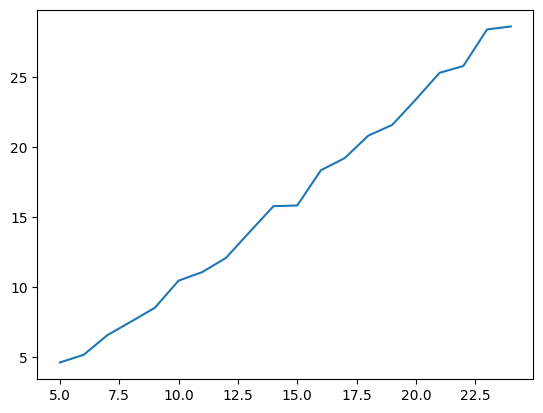

In [40]:
import matplotlib.pyplot as plt

plt.plot(quick_sort_input_sizes, quick_sort_times)
plt.show()

In [55]:
import time

heap_sort = []
heap_sort_times = []
heap_sort_input_sizes = []
for i in range(5, 25):
  ms = 0
  for j in range(10000):
    A = random.sample(string.ascii_lowercase, i)
    start = time.perf_counter()
    heapsort(A)
    end = time.perf_counter()
    ms = ms + (end-start) * 10**6
  heap_sort_times.append(ms/10000)
  heap_sort_input_sizes.append(i)

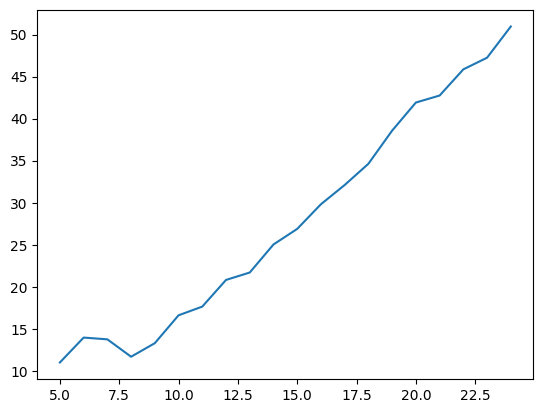

In [56]:
import matplotlib.pyplot as plt

plt.plot(heap_sort_input_sizes, heap_sort_times)
plt.show()

In [60]:
import math

n = []
nlogn = []
for i in range(5, 25):
  n.append(i)
  nlogn.append(i*math.log(i))


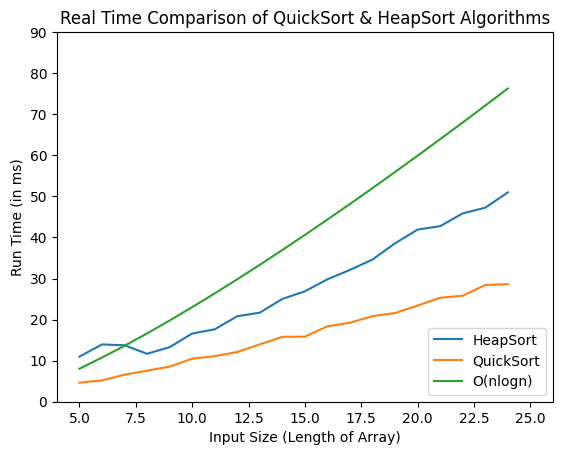

In [66]:
import matplotlib.pyplot as plt

plt.xlim((4, 26))
plt.ylim((0, 90))
plt.plot(heap_sort_input_sizes, heap_sort_times)
plt.plot(quick_sort_input_sizes, quick_sort_times)
plt.plot(n, nlogn)
plt.legend(["HeapSort", "QuickSort", "O(nlogn)"], loc="lower right")
plt.xlabel("Input Size (Length of Array)")
plt.ylabel("Run Time (in ms)")
plt.title("Real Time Comparison of QuickSort & HeapSort Algorithms")
plt.show()

In [72]:
avg_swaps = []
for i in range(5, 25):
  swaps = 0
  for j in range(10000):
    A = random.sample(string.ascii_lowercase, i)
    start = time.perf_counter()
    quickSort(A, 0, len(A) - 1)
    end = time.perf_counter()
  avg_swaps.append(swaps/10000)




In [73]:
avg_swaps

[3.7322,
 4.7698,
 5.8594,
 6.9912,
 8.1271,
 9.3418,
 10.5688,
 11.8236,
 13.1331,
 14.4478,
 15.7515,
 17.115,
 18.4609,
 19.8627,
 21.2486,
 22.6702,
 24.1469,
 25.6195,
 27.0038,
 28.5186]

In [81]:
avg_heap_swaps = []
for i in range(5, 25):
  heap_swaps = 0
  for j in range(10000):
    A = random.sample(string.ascii_lowercase, i)
    start = time.perf_counter()
    heapsort(A)
    end = time.perf_counter()
  avg_heap_swaps.append(heap_swaps/10000)

In [82]:
avg_heap_swaps

[8.8598,
 11.9223,
 14.704,
 18.9218,
 22.6342,
 26.6944,
 30.4028,
 34.783,
 38.6904,
 42.8928,
 46.7519,
 52.0688,
 56.7949,
 61.7712,
 66.3812,
 71.7277,
 76.5165,
 81.623,
 86.2602,
 91.8746]

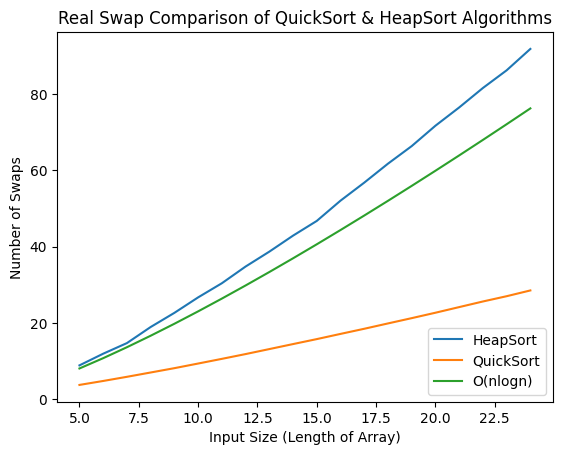

In [83]:
import matplotlib.pyplot as plt

plt.plot(heap_sort_input_sizes, avg_heap_swaps)
plt.plot(quick_sort_input_sizes, avg_swaps)
plt.plot(n, nlogn)
plt.legend(["HeapSort", "QuickSort", "O(nlogn)"], loc="lower right")
plt.xlabel("Input Size (Length of Array)")
plt.ylabel("Number of Swaps")
plt.title("Real Swap Comparison of QuickSort & HeapSort Algorithms")
plt.show()